##### <i>Shantusha Ramsoebhag - 1825217 - 26/01/2023</i>

# Fundamentals of Machine Learning

## Introduction 

For this project, I chose to use a dataset that I found interesting to investigate. I have a passion for doing my own nails and wanted to use that topic for the machine learning assignment. The dataset that I used was the nail data from the Treatwell website, where you specifically choose one treatment to focus on, namely gel polish manicures. In this way, I could focus on investigating the results of a treatment using different data analysis techniques. The Treatwell website offers all kinds of treatments, from nail salons to waxing salons. You can easily find a treatment you like based on the category, location, and date. 

<i>The research question of this project is: Given variables gel polish manicure price, ratings, duration, and location, how well can the gel polish manicure price of different regions be predicted by a machine learning model?</i>

## Dataset

The data was acquired by scraping the following website: 'https://www.treatwell.nl/salons/behandeling-gellak-manicure/aanbod-type-lokaal/in-nl/'.
After scraping the data, I cleaned the it. 

In [1]:
from selenium import webdriver
from turtle import title
import requests
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import math
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np




In [ ]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
driver = webdriver.Chrome(ChromeDriverManager().install(), chrome_options=chrome_options)

#### Data scraping

I scraped the data from the Treatwell website. I comment this out, so it won't run.

In [ ]:
# base_url = 'https://www.treatwell.nl/salons/behandeling-gellak-manicure/aanbod-type-lokaal/in-nl/pagina-'
# url = 'https://www.treatwell.nl/salons/behandeling-gellak-manicure/aanbod-type-lokaal/in-nl/'


# url_list = []
# data = []

# for i in range(1,8):
#     url_p = base_url + str(i)

#     driver.get(url_p)

#     page_source = driver.page_source
#     soup = BeautifulSoup(page_source, 'html.parser')

#     items = soup.find_all(class_='BrowseResult-module--container--a0806d')


#     for item in items:
#         url_pp = item.find('a')['href']
#         url_list.append(url_pp)

        
# for url in url_list:
#     driver.get(url)

#     page_source = driver.page_source
#     soup = BeautifulSoup(page_source, 'html.parser')

#     items = soup.find_all(class_='styles-module--wrapper--0a792c')
#     for item in items:
#         title = item.find(class_='style-module--name--9886df').get_text()
#         rating = item.find(class_='Rating-module_label__1wOHw').get_text()
#         reviewcount = item.find(class_='style-module--reviewCount--e5a80c').get_text()
#         location = item.find(class_='style-module--location--0b3b15').get_text().strip()
            
#         data_info = {
#             'title': title,
#             'rating': rating,
#             'review count': reviewcount,
#             'location': location,
#         }
#     data.append(data_info)


# driver.close()
# data

In [ ]:
# df = pd.DataFrame(data)
# df.to_excel("data_nails_final.xlsx", index=False)

### Data Cleaning

To start the data cleaning process, the dataset was imported.

In [2]:
# Importing csv
nail_salons = pd.read_csv('data_nails_final2.csv', sep=';')
nail_salons.head

<bound method NDFrame.head of                                         title rating  review count  \
0                                     Tip Top    3,5   363 reviews   
1                             Priority Beauty      5    12 reviews   
2    Amsterdam Nail Art studio - Elandsgracht    4,2   530 reviews   
3                                   SR Beauty      5     6 reviews   
4                                 NAGL STUDIO      4  1154 reviews   
..                                        ...    ...           ...   
174                               Icon Beauty    4,9   104 reviews   
175                           Flamingo Beauty      5   139 reviews   
176                             You Nailed It    4,9   324 reviews   
177                              MOOi by Dona    4,8   149 reviews   
178                        PinkDiamond Beauty    4,6   704 reviews   

                                            location Gellak manicure prijs  \
0               Korte Lijnbaan 9b, Rotterdam, 3012E

The first step was to drop all the NaN values, so my analyses weren't going to be impacted by empty rows. I checked the data types of the columns using the .info() function. In order to work with the data, I needed to change the datatype of the following columns: 
* Rating
* Review count
* Gel polish manicure prijs

In [3]:
# Dropping NaN values and checking datatypes
nail_salons.dropna(inplace = True)
nail_salons.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 178
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  157 non-null    object 
 1   rating                 157 non-null    object 
 2   review count           157 non-null    object 
 3   location               157 non-null    object 
 4   Gellak manicure prijs  157 non-null    object 
 5   Duur (min)             157 non-null    float64
dtypes: float64(1), object(5)
memory usage: 8.6+ KB


Here, I changed the data types of the columns. Floats are datatypes with decimal values, so since the columns 'rating' and 'gellak manicure prijs' are values with decimals, the comma needed to be a period, and the data type needed to be a float instead of an object (Processing, n.d.). 

For the review count data, the data type needed to change from an object to an integer. This data only consists of round numbers, so that's why it needs be changed to an integer (Processing, n.d.). For this to happen, the word 'reviews' needed to be removed. 

I also changed the datatype of the 'Duur (min)' from float to integer because the data consist of round numbers with no decimal values.

To use the location data, I split the data into 3 new values, namely address, place, and postal code, and I also removed the extra whitespaces in the values of column 'place'.

In [4]:
# Change datatypes
nail_salons['rating'] = nail_salons['rating'].replace({',': '.'}, regex=True)
nail_salons['rating'] = nail_salons['rating'].astype(float)

nail_salons['review count'] = nail_salons['review count'].replace({'reviews': ''}, regex=True)
nail_salons['review count']
nail_salons['review count'] = nail_salons['review count'].astype(int)

nail_salons['Gellak manicure prijs'] = nail_salons['Gellak manicure prijs'].replace({',': '.'}, regex=True)
nail_salons['Gellak manicure prijs']
nail_salons['Gellak manicure prijs'] = nail_salons['Gellak manicure prijs'].astype(float)

nail_salons['Duur (min)'] = nail_salons['Duur (min)'].astype(int)

# Split location data 
salon_location = nail_salons['location'].str.split(",", n = 3, expand = True)
nail_salons['address'] = salon_location[0]
nail_salons['place'] = salon_location[1]
nail_salons['postal_code'] = salon_location[2]
nail_salons.drop(columns =['location'], inplace = True)

# Remove extra whitespace
nail_salons['place'] = nail_salons['place'].str.strip()

nail_salons

,title,rating,review count,Gellak manicure prijs,Duur (min),address,place,postal_code
0,Tip Top,3.5,363,35.0,40,Korte Lijnbaan 9b,Rotterdam,3012EC
1,Priority Beauty,5.0,12,50.0,75,Katendrechtse Lagedijk 465D,Rotterdam,3082 GC
2,Amsterdam Nail Art studio - Elandsgracht,4.2,530,40.0,30,Elandsgracht 1A,Amsterdam,1016 TM
3,SR Beauty,5.0,6,36.0,90,Schumanflat 119,Uithoorn,1422 GA
4,NAGL STUDIO,4.0,1154,35.0,30,Lange Elisabethstraat 34,Utrecht,3511JD
...,...,...,...,...,...,...,...,...
174,Icon Beauty,4.9,104,43.0,55,Bart Poesiatstraat 62,Amsterdam,1069 SE
175,Flamingo Beauty,5.0,139,70.0,90,Zeesluisweg 78,Den Haag,2583 DS
176,You Nailed It,4.9,324,35.0,45,Galileo Galileistraat 17,Almere,1349 DN
177,MOOi by Dona,4.8,149,55.0,60,Kikkerveen 105,Spijkenisse,3205 XA


To be more consistent in the column names, I changed the titles of the columns. GM_price stands for Gel Polish Manicure Price.

In [5]:
# Chaning the column names 
nail_salons.columns = ['salons', 'rating', 'review_count', 'GM_price', 'duration', 'address', 'area', 'postal_code']
nail_salons

,salons,rating,review_count,GM_price,duration,address,area,postal_code
0,Tip Top,3.5,363,35.0,40,Korte Lijnbaan 9b,Rotterdam,3012EC
1,Priority Beauty,5.0,12,50.0,75,Katendrechtse Lagedijk 465D,Rotterdam,3082 GC
2,Amsterdam Nail Art studio - Elandsgracht,4.2,530,40.0,30,Elandsgracht 1A,Amsterdam,1016 TM
3,SR Beauty,5.0,6,36.0,90,Schumanflat 119,Uithoorn,1422 GA
4,NAGL STUDIO,4.0,1154,35.0,30,Lange Elisabethstraat 34,Utrecht,3511JD
...,...,...,...,...,...,...,...,...
174,Icon Beauty,4.9,104,43.0,55,Bart Poesiatstraat 62,Amsterdam,1069 SE
175,Flamingo Beauty,5.0,139,70.0,90,Zeesluisweg 78,Den Haag,2583 DS
176,You Nailed It,4.9,324,35.0,45,Galileo Galileistraat 17,Almere,1349 DN
177,MOOi by Dona,4.8,149,55.0,60,Kikkerveen 105,Spijkenisse,3205 XA


A subset of the original dataframe was made to only work with the most important values for this project, namely 'rating', 'review_count', 'GM_price', 'duration' and 'area'. Then the selection of data was narrowed down to ensure that no strange values would impact the data analyses. For example, the duration of a treatment is usually not less than 20 minutes since the treatment consists of two parts:
* Doing the manicure
* Polish the nails with gel

In [6]:
# Creating a subset
df_selection = nail_salons[['rating', 'review_count', 'GM_price', 'duration', 'area']]

# Narrow down the selection
df_selection = df_selection[df_selection['duration'] > 20]
df_selection = df_selection[(df_selection['GM_price'] > 10) & (df_selection['GM_price'] < 65)]
df_selection = df_selection[df_selection['review_count'] > 5]
df_selection

,rating,review_count,GM_price,duration,area
0,3.5,363,35.00,40,Rotterdam
1,5.0,12,50.00,75,Rotterdam
2,4.2,530,40.00,30,Amsterdam
3,5.0,6,36.00,90,Uithoorn
4,4.0,1154,35.00,30,Utrecht
...,...,...,...,...,...
173,4.4,826,33.99,45,Rotterdam
174,4.9,104,43.00,55,Amsterdam
176,4.9,324,35.00,45,Almere
177,4.8,149,55.00,60,Spijkenisse


## Feature engineering

To predict the price of future salons in certain regions, I created the regions. Based on this, I looked up the provinces and the region division and divided the provinces into the region division (Regioindeling KNMI, 2020).

In [7]:
# (Custer, 2020) https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/

# Conditions based on region division 
conditions = [
    (df_selection['area'] == 'Groningen'),
    (df_selection['area'] == 'Alkmaar') | (df_selection['area'] == 'Amstelveen') | (df_selection['area'] == 'Amsterdam') | (df_selection['area'] == 'Beverwijk') | (df_selection['area'] == 'Blaricum') | (df_selection['area'] == 'Haarlem') | (df_selection['area'] == 'Heemstede') | (df_selection['area'] == 'Hilversum') | (df_selection['area'] == 'Hoorn') | (df_selection['area'] == 'Huizen') | (df_selection['area'] == 'Uithoorn') | (df_selection['area'] == 'Zaandam'),
    (df_selection['area'] == 'Almere') | (df_selection['area'] == 'Amersfoort') | (df_selection['area'] == 'Arnhem') | (df_selection['area'] == 'Driebergen') | (df_selection['area'] == 'Maarssen') | (df_selection['area'] == 'Leusden') | (df_selection['area'] == 'Soest') | (df_selection['area'] == 'Utrecht') | (df_selection['area'] == 'Velp') | (df_selection['area'] == 'Zeist'),
    (df_selection['area'] == 'Doetinchem'),
    (df_selection['area'] == 'Alphen aan den Rijn') | (df_selection['area'] == 'Capelle aan den Ijssel') | (df_selection['area'] == 'Delft') | (df_selection['area'] == 'Den Haag') | (df_selection['area'] == 'Dordrecht') | (df_selection['area'] == 'Gouda') | (df_selection['area'] == 'Leiden') | (df_selection['area'] == 'Leidschendam') | (df_selection['area'] == 'Monster') | (df_selection['area'] == 'Oud-Beijerland') | (df_selection['area'] == 'Rhoon') | (df_selection['area'] == 'Rotterdam') | (df_selection['area'] == 'Spijkenisse') | (df_selection['area'] == 'Voorburg') | (df_selection['area'] == 'Zevenhuizen') | (df_selection['area'] == 'Zoetermeer'),
    (df_selection['area'] == 'Breda') | (df_selection['area'] == 'Den Bosch') | (df_selection['area'] == 'Eindhoven') | (df_selection['area'] == 'Helmond') | (df_selection['area'] == 'Maastricht') | (df_selection['area'] == 'Tilburg'), 
    ]

values = ['north', 'northwest', 'middle', 'east', 'southwest', 'southeast']

df_selection['regions'] = np.select(conditions, values)
df_selection


,rating,review_count,GM_price,duration,area,regions
0,3.5,363,35.00,40,Rotterdam,southwest
1,5.0,12,50.00,75,Rotterdam,southwest
2,4.2,530,40.00,30,Amsterdam,northwest
3,5.0,6,36.00,90,Uithoorn,northwest
4,4.0,1154,35.00,30,Utrecht,middle
...,...,...,...,...,...,...
173,4.4,826,33.99,45,Rotterdam,southwest
174,4.9,104,43.00,55,Amsterdam,northwest
176,4.9,324,35.00,45,Almere,middle
177,4.8,149,55.00,60,Spijkenisse,southwest


To check if there are enough values the machine learning model can use to predict, I counted the values for each region.

In [8]:
df_selection['regions'].value_counts()

northwest    63
southwest    45
middle       30
southeast     9
north         3
east          1
Name: regions, dtype: int64

The region east has one value. I eliminated this region because, to predict the price of a treatment in a specific region, there needs to be more data about that region to make it more successful. If there is just one value, I can assume that the model will predict it correctly. The north region also has the fewest values, but I'll include it in the analyses because I'm curious to see if the model can accurately predict based on three values. 

In [9]:
df_selection = df_selection[df_selection.regions != 'east']
df_selection['regions'].value_counts()

northwest    63
southwest    45
middle       30
southeast     9
north         3
Name: regions, dtype: int64

The region's values are still objects, so in order to use the categorical values, I changed them into dummie values.

In [10]:
# Dummie variables
dummies = pd.get_dummies(df_selection["regions"])
dummies

,middle,north,northwest,southeast,southwest
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,1,0,0
3,0,0,1,0,0
4,1,0,0,0,0
...,...,...,...,...,...
173,0,0,0,0,1
174,0,0,1,0,0
176,1,0,0,0,0
177,0,0,0,0,1


After creating the dummie variables, I unified this dataframe with the df_selection dataframe.

In [11]:
# Unifying both dataframes
df = pd.concat([df_selection, dummies], axis=1)
df

,rating,review_count,GM_price,duration,area,regions,middle,north,northwest,southeast,southwest
0,3.5,363,35.00,40,Rotterdam,southwest,0,0,0,0,1
1,5.0,12,50.00,75,Rotterdam,southwest,0,0,0,0,1
2,4.2,530,40.00,30,Amsterdam,northwest,0,0,1,0,0
3,5.0,6,36.00,90,Uithoorn,northwest,0,0,1,0,0
4,4.0,1154,35.00,30,Utrecht,middle,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
173,4.4,826,33.99,45,Rotterdam,southwest,0,0,0,0,1
174,4.9,104,43.00,55,Amsterdam,northwest,0,0,1,0,0
176,4.9,324,35.00,45,Almere,middle,1,0,0,0,0
177,4.8,149,55.00,60,Spijkenisse,southwest,0,0,0,0,1


## Descriptive analysis

Now that the data is cleaned up and ready to use, I made some graphs and tables to visualize the data.

I started visualizing the price values of gel polish manicures since that is an important variable in this project. The plot was used for this so that the highest and lowest values could be easily seen. 

C:\Temp\ipykernel_11972\1014629985.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GM_price'], rug=True)


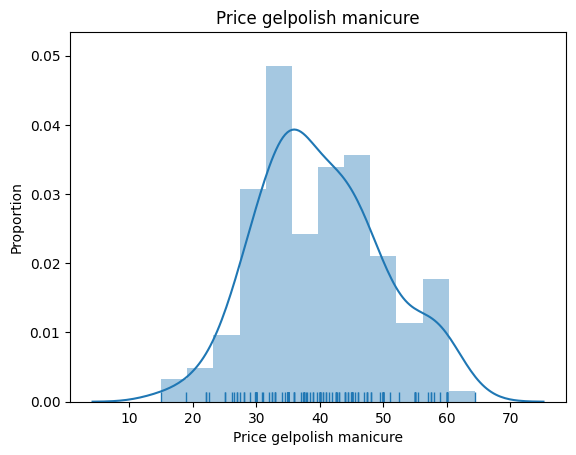

In [12]:
sns.distplot(df['GM_price'], rug=True)
plt.title('Price gelpolish manicure')
plt.xlabel('Price gelpolish manicure')
plt.ylabel('Proportion')
plt.show()

The distribution can be described as follows:
* Normality: The distribution of the values is somewhat normal, but the values are a bit skewed to the left.
* Variation: There is a lot of variation. The most common gel polish manicure prices are between 25 and 60 euros.
* Modality: There is one high peak that indicates the most frequent price for the treatment, and that's around 35 euros.
* Skewness: the distribution is a little skewed to the left.
* Outliers: There are some outliers before 25 and after 60.

Then I wanted to visualize the variables of price and regions together to see how the price values are distributed around each region. The swarmplot really gives a nice overview of the distributed values; seeing outliers is very easy with this.

<AxesSubplot: xlabel='GM_price', ylabel='regions'>

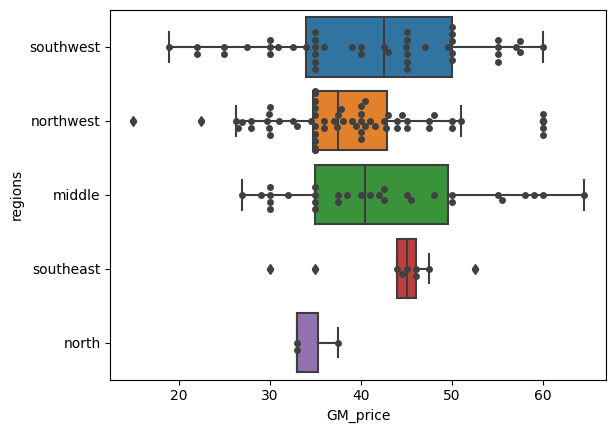

In [13]:
sns.boxplot(x = df['GM_price'],
            y = df['regions']
            )

sns.swarmplot(x = df['GM_price'],
            y = df['regions'], color='.25'
            )

The distribution can be described as follows:
* Normality/Skewness: The distribution of the values of the regions southwest, northwest, and middle is somewhat normal, but the values are a bit skewed. For the southwest region, it is skewed to the left; for the northwest region, it is a little skewed to the right; and for the middle region, it is skewed to the right as well.
* Variation: The variation in prices differs for each region. It is more evenly distributed in the southwest, with values ranging from 20 to 60 euros. For northwest it is mostly between 26 and 50 euros, with some outliers around that. For the middle region, it is mostly between 27 and 50 euros. For the southeast region, there is a small amount of data that shows the most values between 40 and 50 euros, with some outliers. For the east region, there is one value of 50 euros, and the data for the north region is also small, between 30 and 40 euros.
* Modality: There is one peak for all the regions.
* Outliers: The northwest and southeast regions have some outliers.

I also wanted to see how well salons were rated in different regions. For this, the box plot and swarm plot were used.

C:\Users\tusha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:3543: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\tusha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:3543: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot: xlabel='rating', ylabel='regions'>

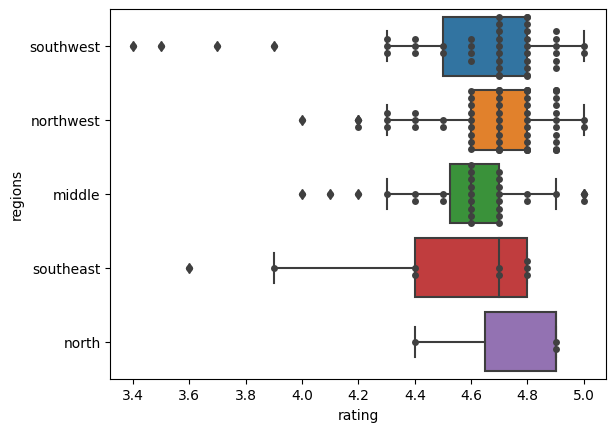

In [14]:
sns.boxplot(x = df['rating'],
            y = df['regions']
            )

sns.swarmplot(x = df['rating'],
            y = df['regions'], color='.25'
            )

From this boxplot, it is clear that the majority of ratings in the southwest and northwest are between 4.6 and 4.9, with some outliers. The region's middle scores are the highest, between 4.4 and 4.8, but it has more outliers than the other regions. For the regions southeast, east, and north, the values are between 4.4 and 4.9, but these points are a small group.

To see which variables correlate with each other, I made a scatterplot matrix, a correlation matrix, and a heatmap. This way, I could see the correlations occurring in different visualizations.

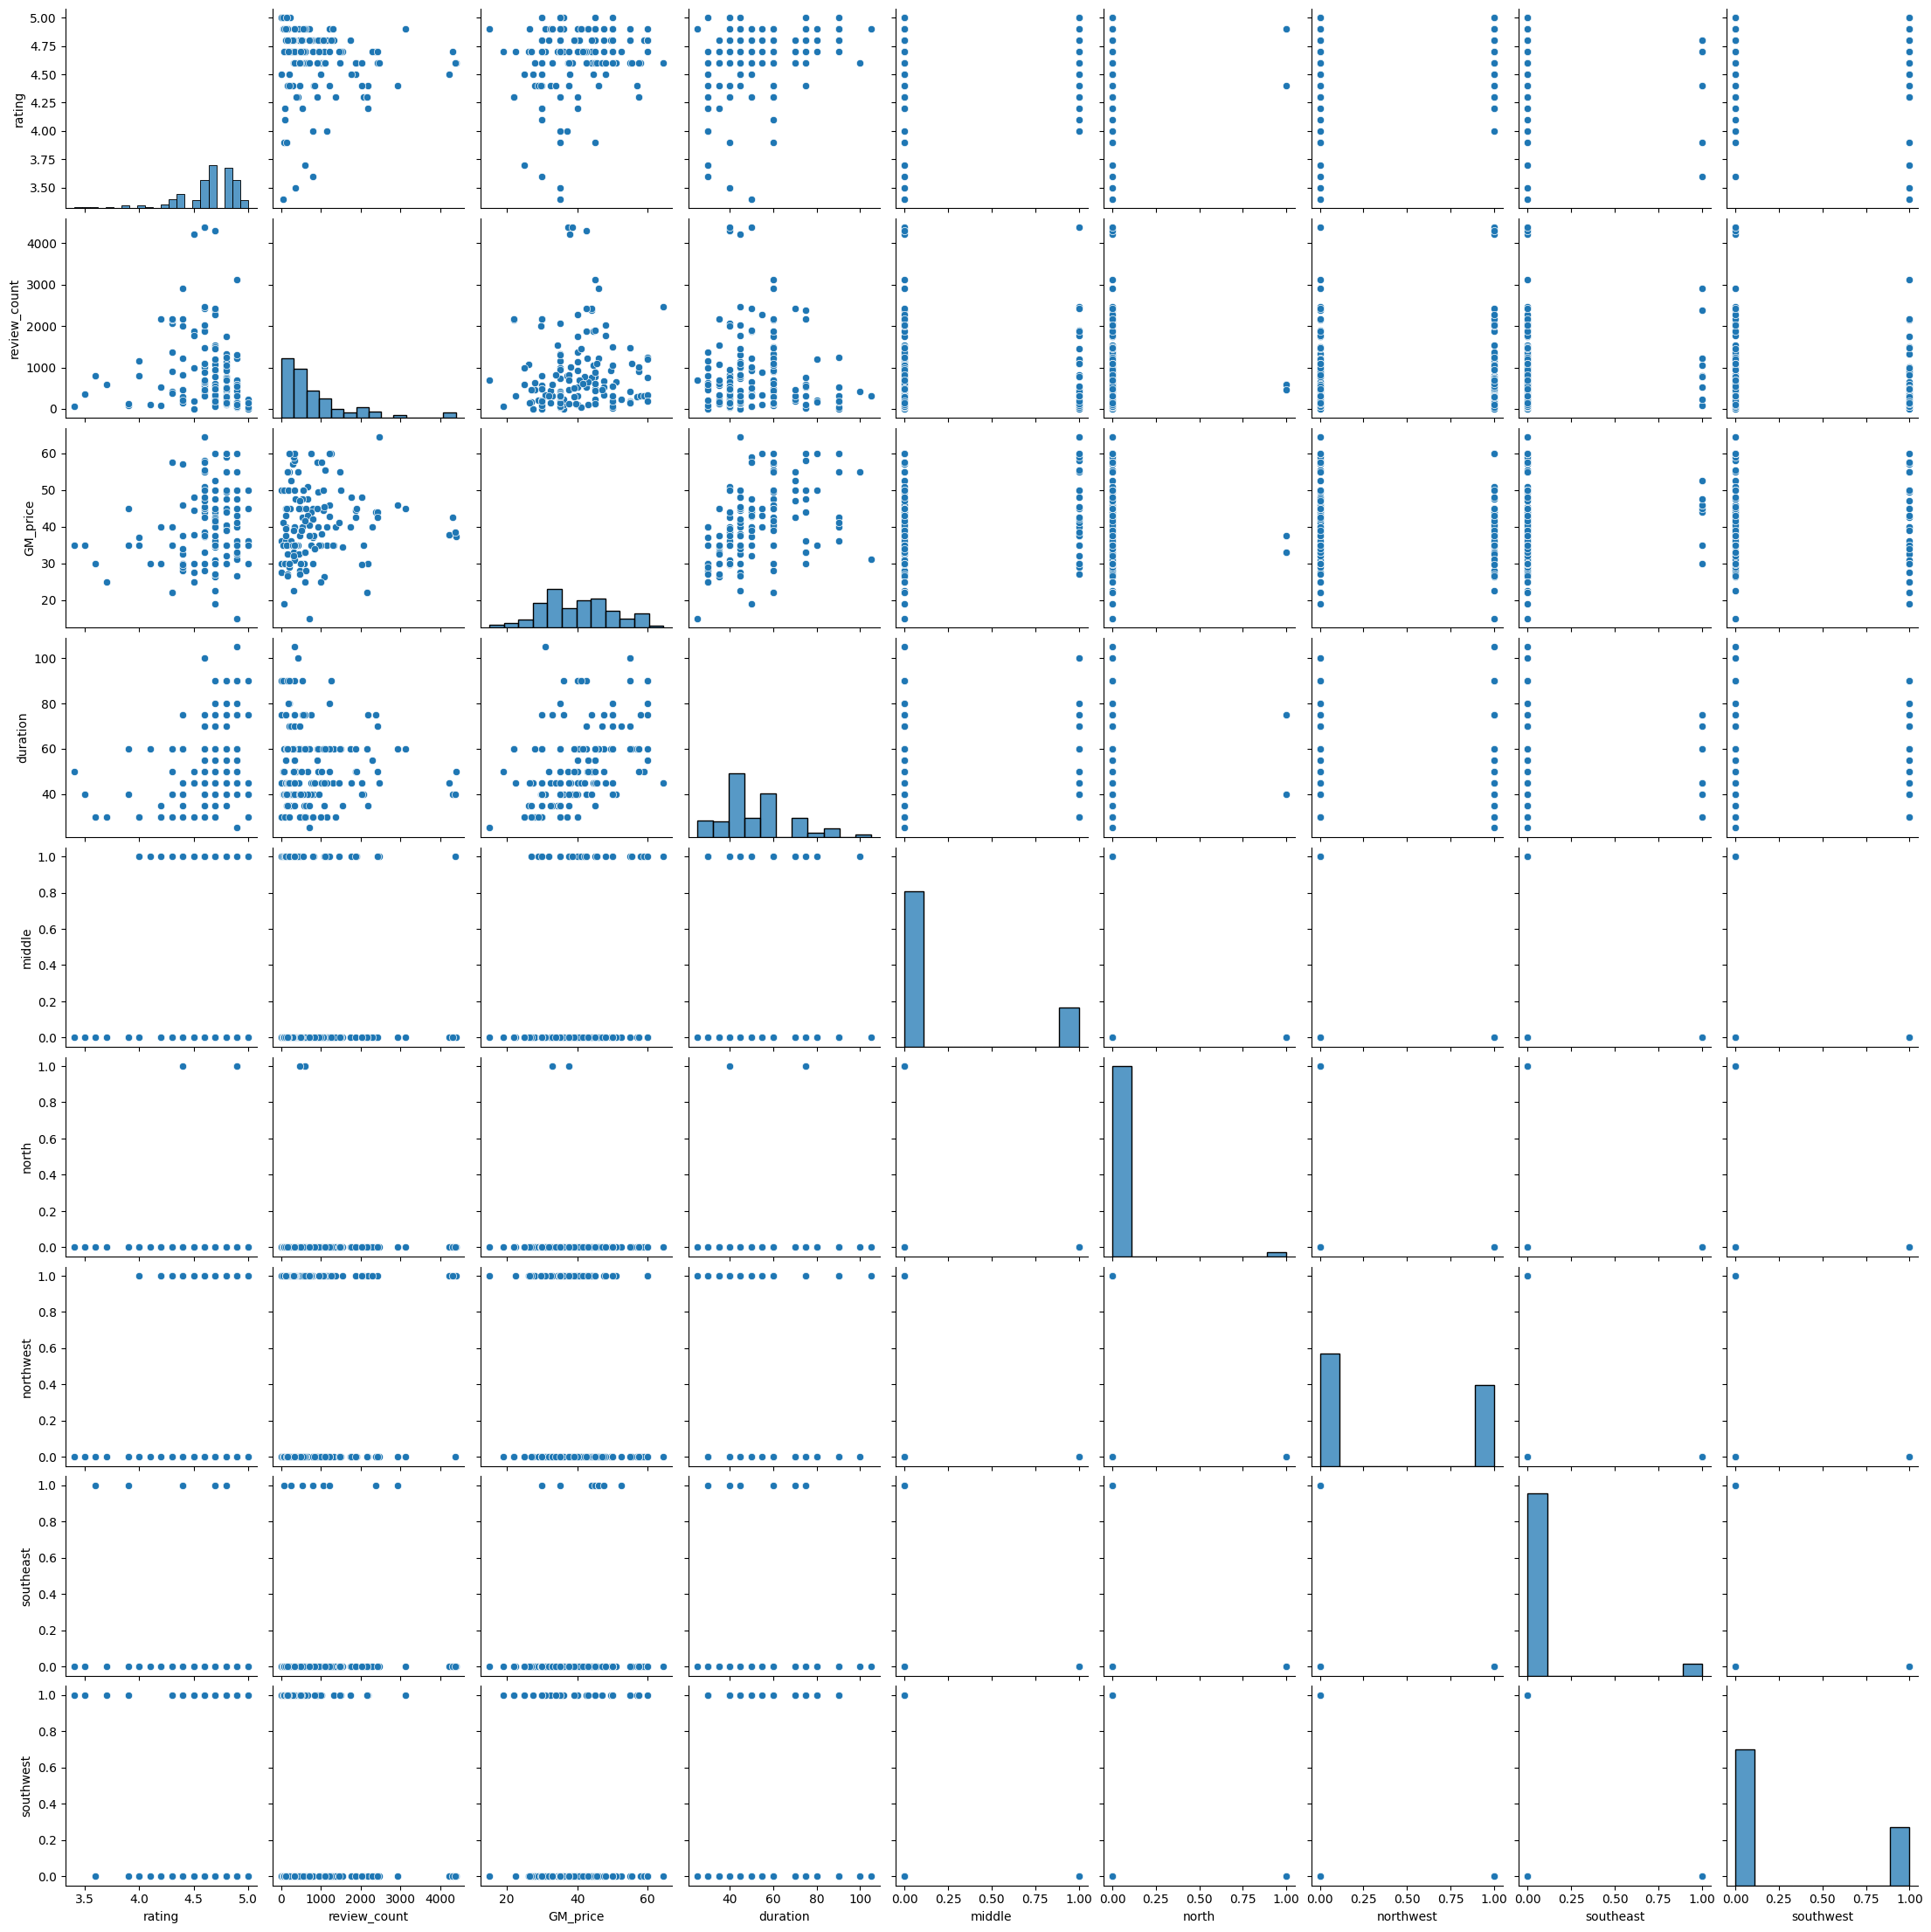

In [15]:
sns.pairplot(df)
plt.show()

In [16]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

C:\Temp\ipykernel_11972\3784545759.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,rating,review_count,GM_price,duration,middle,north,northwest,southeast,southwest
rating,1.000000,-0.112894,0.211787,0.308577,-0.065037,0.049442,0.176857,-0.157076,-0.067413
review_count,-0.112894,1.000000,0.059797,-0.054227,0.027974,-0.046627,0.062774,0.076465,-0.117410
GM_price,0.211787,0.059797,1.000000,0.442540,0.093365,-0.082982,-0.146058,0.083141,0.058078
duration,0.308577,-0.054227,0.442540,1.000000,-0.092546,0.095707,-0.147315,0.050659,0.183951
middle,-0.065037,0.027974,0.093365,-0.092546,1.000000,-0.071429,-0.425481,-0.126323,-0.327327
north,0.049442,-0.046627,-0.082982,0.095707,-0.071429,1.000000,-0.121566,-0.036092,-0.093522
northwest,0.176857,0.062774,-0.146058,-0.147315,-0.425481,-0.121566,1.000000,-0.214992,-0.557086
southeast,-0.157076,0.076465,0.083141,0.050659,-0.126323,-0.036092,-0.214992,1.000000,-0.165395
southwest,-0.067413,-0.117410,0.058078,0.183951,-0.327327,-0.093522,-0.557086,-0.165395,1.000000


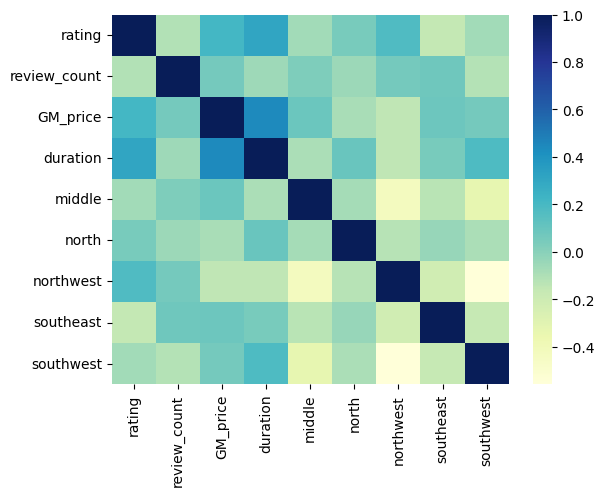

In [17]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="YlGnBu") 
plt.show()

From both visualizations, it is clear that the price of a gel polish manicure treatment correlates best with the duration of the treatment. Other correlations that stood out were:
* Price and duration has te highest correlation which eachother
* Rating and duration correlates
* Rating and price correlates

The regions all had a very weak or low correlation with the variables price, rating, and review count. However, when compared to other regions such as the east, middle, north, and northwest, the southeast and southwest had the highest correlation with price and rating.

Based on the highest correlations between the variables and the goal of this project, I made a new subset of the whole dataframe, and I will make smaller subsets for each region. This way, I can run a predictive model on the whole dataset and on each region to see how the model would predict the price for each region based on data from each region and based on data from the whole dataset.

In [18]:
# Subset dataset based on the most important variables for this project.
df_subset = df[['GM_price', 'duration','rating', 'middle', 'southeast', 'southwest', 'northwest', 'north']]
df_subset

,GM_price,duration,rating,middle,southeast,southwest,northwest,north
0,35.00,40,3.5,0,0,1,0,0
1,50.00,75,5.0,0,0,1,0,0
2,40.00,30,4.2,0,0,0,1,0
3,36.00,90,5.0,0,0,0,1,0
4,35.00,30,4.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
173,33.99,45,4.4,0,0,1,0,0
174,43.00,55,4.9,0,0,0,1,0
176,35.00,45,4.9,1,0,0,0,0
177,55.00,60,4.8,0,0,1,0,0


#### Subset dataset region middle

In [19]:
# Subset dataset specifically for region middle
df_subset_middle = df[['GM_price', 'duration', 'rating', 'middle']]
df_subset_middle = df_subset_middle[df_subset_middle['middle'] == 1]
df_subset_middle

,GM_price,duration,rating,middle
4,35.00,30,4.0,1
6,30.00,30,5.0,1
7,35.00,40,5.0,1
14,35.00,40,4.3,1
15,30.00,60,4.1,1
43,40.00,40,4.7,1
44,30.00,30,4.2,1
46,37.50,40,4.4,1
61,41.00,45,4.7,1
62,45.00,50,4.6,1


#### Subset dataset region southeast

In [20]:
# Subset dataset specifically for region southeast
df_subset_southeast = df[['GM_price', 'duration', 'rating', 'southeast']]
df_subset_southeast = df_subset_southeast[df_subset_southeast['southeast'] == 1]
df_subset_southeast

,GM_price,duration,rating,southeast
18,44.5,45,4.8,1
26,44.0,75,4.7,1
37,30.0,30,3.6,1
64,45.0,45,4.8,1
67,46.0,60,4.4,1
70,46.0,60,4.4,1
107,35.0,40,3.9,1
113,52.5,70,4.7,1
154,47.5,75,4.8,1


#### Subset dataset region southwest

In [21]:
# Subset dataset specifically for region southwest
df_subset_southwest = df[['GM_price', 'duration', 'rating', 'southwest']]
df_subset_southwest = df_subset_southwest[df_subset_southwest['southwest'] == 1]
df_subset_southwest

,GM_price,duration,rating,southwest
0,35.00,40,3.5,1
1,50.00,75,5.0,1
11,27.50,45,4.5,1
12,35.00,60,4.8,1
19,55.00,70,4.8,1
20,40.00,60,4.8,1
25,42.50,90,4.7,1
32,45.00,60,4.8,1
33,50.00,60,4.7,1
35,35.00,80,4.8,1


#### Subset dataset region northwest

In [22]:
# Subset dataset specifically for region northwest
df_subset_northwest = df[['GM_price', 'duration', 'rating', 'northwest']]
df_subset_northwest = df_subset_northwest[df_subset_northwest['northwest'] == 1]
df_subset_northwest

,GM_price,duration,rating,northwest
2,40.00,30,4.2,1
3,36.00,90,5.0,1
9,29.95,35,4.6,1
10,34.50,35,4.7,1
13,28.00,60,4.4,1
...,...,...,...,...
162,41.50,60,4.7,1
165,35.00,40,4.7,1
172,48.00,45,4.6,1
174,43.00,55,4.9,1


#### Subset dataset region north

In [23]:
# Subset dataset specifically for region North
df_subset_north = df[['GM_price', 'duration', 'rating', 'north']]
df_subset_north = df_subset_north[df_subset_north['north'] == 1]
df_subset_north

,GM_price,duration,rating,north
133,33.0,75,4.9,1
146,33.0,75,4.9,1
157,37.5,40,4.4,1


## Predictive model: Multiple linear regression

I have chosen the multiple linear regression model since I want to predict a dependent variable (price of a gel polish manicure) based on independent variables (duration, rating, and each region). The multiple linear regression model is one of the most straightforward and widely used machine learning methods that predicts the correlation between dependent and independent variables (Maulud & Abdulazeez, 2020). Using this method will benefit the research of this project in two ways:
1. This model is made for doing prediction analyses.
2. Using this model can establish strong links between the dependent and independent variables.
(Maulud & Abdulazeez, 2020)


I predict the price of each region in two ways. The first prediction only involves the data of the specific region, and the second prediction involves the data of the whole dataset. In this way, I can see the different predictions based on regions and based on the dataset with multiple regions and data. I started with the predictions for the specific regions.

##### Multiple linear regression on middle dataset

In [24]:
X_m = df_subset_middle[['duration', 'rating', 'middle']] 
y_m = df_subset_middle['GM_price']

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_m, y_m, test_size=0.3, random_state=1) 
X_train_m.head() 

lm = LinearRegression() 
lm.fit(X_train_m, y_train_m) 

LinearRegression()

In [25]:
y_test_p_m = lm.predict(X_test_m) 

In [26]:
df_pred_m = pd.DataFrame({'duration': X_test_m['duration'], 'rating': X_test_m['rating'], 'middle': X_test_m['middle'], 'GM_price': y_test_m, 'price_p': lm.predict(X_test_m)})
df_pred_m 

,duration,rating,middle,GM_price,price_p
106,45,4.5,1,48.00,38.352395
127,70,4.7,1,42.50,49.618554
63,45,4.6,1,64.45,38.994431
122,40,4.6,1,38.50,36.998013
96,80,4.7,1,60.00,53.611389
124,45,4.6,1,45.50,38.994431
161,70,4.6,1,50.00,48.976518
14,40,4.3,1,35.00,35.071905
150,60,4.6,1,42.50,44.983683


In the table above, the original and predicted prices for the middle region are placed side by side. The predictions are very accurate in some cases and very inaccurate in others. For instance, number 63 has an original price of 64,45 but a predicted price of 38,99. This is very inaccurate. Number 14 is an example of a very accurate prediction, with the original price of 35,00 and the predicted price of 35,07. 

##### Multiple linear regression on southeast dataset

In [27]:
#southeast

X_se = df_subset_southeast[['duration', 'rating', 'southeast']] 
y_se = df_subset_southeast['GM_price']

X_train_se, X_test_se, y_train_se, y_test_se = train_test_split(X_se, y_se, test_size=0.3, random_state=1) 
X_train_se.head() 

lm = LinearRegression() 
lm.fit(X_train_se, y_train_se) 

LinearRegression()

In [28]:
y_test_p_se = lm.predict(X_test_se) 

In [29]:
df_pred_se = pd.DataFrame({'duration': X_test_se['duration'], 'rating': X_test_se['rating'], 'southeast': X_test_se['southeast'], 'GM_price': y_test_se, 'price_p': lm.predict(X_test_se)})
df_pred_se 

,duration,rating,southeast,GM_price,price_p
154,75,4.8,1,47.5,48.158673
37,30,3.6,1,30.0,42.038265
107,40,3.9,1,35.0,43.441156


In the southeast region, the price predictions are also very different from each other.

##### Multiple linear regression on southwest dataset

In [30]:
# southwest

X_sw = df_subset_southwest[['duration', 'rating', 'southwest']] 
y_sw = df_subset_southwest['GM_price']

X_train_sw, X_test_sw, y_train_sw, y_test_sw = train_test_split(X_sw, y_sw, test_size=0.3, random_state=1) 
X_train_sw.head() 

lm = LinearRegression() 
lm.fit(X_train_sw, y_train_sw) 

LinearRegression()

In [31]:
y_test_p_sw = lm.predict(X_test_sw) 

In [32]:
df_pred_sw = pd.DataFrame({'duration': X_test_sw['duration'], 'rating': X_test_sw['rating'], 'southwest': X_test_sw['southwest'], 'GM_price': y_test_sw, 'price_p': lm.predict(X_test_sw)})
df_pred_sw 

,duration,rating,southwest,GM_price,price_p
12,60,4.8,1,35.0,43.746109
11,45,4.5,1,27.5,38.748954
136,90,4.8,1,60.0,51.593275
95,45,4.9,1,32.5,40.180383
102,55,4.6,1,45.0,41.722533
167,70,4.6,1,47.0,45.646117
93,60,4.8,1,49.5,43.746109
151,60,3.9,1,45.0,40.525394
145,30,3.7,1,25.0,31.962513
143,50,4.7,1,19.0,40.772529


For the southwest region, the price predictions are also very different from each other. In some cases, they differ by 5–10 euros, and in other cases, they differ by 20 euros.

##### Multiple linear regression on northwest dataset

In [33]:
#northwest
X_nw = df_subset_northwest[['duration', 'rating', 'northwest']] 
y_nw = df_subset_northwest['GM_price']

X_train_nw, X_test_nw, y_train_nw, y_test_nw = train_test_split(X_nw, y_nw, test_size=0.3, random_state=1) 
X_train_nw.head() 

lm = LinearRegression() 
lm.fit(X_train_nw, y_train_nw) 

LinearRegression()

In [34]:
y_test_p_nw = lm.predict(X_test_nw) 

In [35]:
df_pred_nw = pd.DataFrame({'duration': X_test_nw['duration'], 'rating': X_test_nw['rating'], 'northwest': X_test_nw['northwest'], 'GM_price': y_test_nw, 'price_p': lm.predict(X_test_nw)})
df_pred_nw 

,duration,rating,northwest,GM_price,price_p
50,90,4.9,1,40.00,47.901189
88,55,4.8,1,60.00,39.806428
129,40,4.4,1,29.75,36.181136
53,60,4.9,1,47.50,41.000289
174,55,4.9,1,43.00,39.850139
9,35,4.6,1,29.95,35.118407
47,50,4.6,1,44.00,38.568857
99,35,4.7,1,45.00,35.162117
92,25,4.9,1,15.00,32.949238
111,55,4.7,1,40.00,39.762718


Also, for the northwest region, the price predictions differ a lot.

##### Multiple linear regression on north dataset

In [36]:
X_n = df_subset_north[['duration', 'rating', 'north']] 
y_n= df_subset_north['GM_price']

X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n, y_n, test_size=0.3, random_state=1) 
X_train_n.head() 

lm = LinearRegression() 
lm.fit(X_train_n, y_train_n) 

LinearRegression()

In [37]:
y_test_p_n = lm.predict(X_test_n) 

In [38]:
df_pred_n = pd.DataFrame({'duration': X_test_n['duration'], 'rating': X_test_n['rating'], 'north': X_test_n['north'], 'GM_price': y_test_n, 'price_p': lm.predict(X_test_n)})
df_pred_n 

,duration,rating,north,GM_price,price_p
133,75,4.9,1,33.0,33.0


For the northern region, I already assumed that the model would predict a very accurate price.

##### Multiple linear regression on whole data subset

In [39]:
X = df_subset[['duration', 'rating', 'middle', 'southeast', 'southwest', 'north', 'northwest']] 
y = df_subset['GM_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 
X_train.head() 

lm = LinearRegression() 
lm.fit(X_train, y_train) 

LinearRegression()

In [40]:
y_test_p = lm.predict(X_test) 

In [41]:
df_pred = pd.DataFrame({'duration': X_test['duration'], 'rating': X_test['rating'], 'north': X_test['north'], 'northwest': X_test['northwest'], 'middle': X_test['middle'], 'southeast': X_test['southeast'], 'southwest': X_test['southwest'], 'GM_price': y_test, 'price_p': lm.predict(X_test)})
df_pred 

,duration,rating,north,northwest,middle,southeast,southwest,GM_price,price_p
16,50,4.9,0,1,0,0,0,42.75,38.388304
116,35,4.7,0,1,0,0,0,27.00,34.067859
86,90,4.8,0,1,0,0,0,60.00,46.977333
18,45,4.8,0,0,0,1,0,44.50,42.650769
156,75,4.9,0,1,0,0,0,50.00,44.045805
61,45,4.7,0,0,1,0,0,41.00,39.377959
168,60,4.6,0,0,1,0,0,55.50,42.309488
47,50,4.6,0,1,0,0,0,44.00,36.999388
32,60,4.8,0,0,0,0,1,45.00,42.058968
143,50,4.7,0,0,0,0,1,19.00,39.332996


For the whole dataset, the predictions per region also differ from each other.

To visualize the predicted prices per region based on the whole dataset, an extra column that defines the region in one column will help. I used this for the visualization of the last lmplot.

In [42]:
conditions = [
    (df_pred['north'] == 1),
    (df_pred['northwest'] == 1),
    (df_pred['middle'] == 1),
    (df_pred['southeast'] == 1),
    (df_pred['southwest'] == 1),
    ]

values = ['north', 'northwest', 'middle', 'southwest', 'southeast']

df_pred['regions'] = np.select(conditions, values)
df_pred

,duration,rating,north,northwest,middle,southeast,southwest,GM_price,price_p,regions
16,50,4.9,0,1,0,0,0,42.75,38.388304,northwest
116,35,4.7,0,1,0,0,0,27.00,34.067859,northwest
86,90,4.8,0,1,0,0,0,60.00,46.977333,northwest
18,45,4.8,0,0,0,1,0,44.50,42.650769,southwest
156,75,4.9,0,1,0,0,0,50.00,44.045805,northwest
61,45,4.7,0,0,1,0,0,41.00,39.377959,middle
168,60,4.6,0,0,1,0,0,55.50,42.309488,middle
47,50,4.6,0,1,0,0,0,44.00,36.999388,northwest
32,60,4.8,0,0,0,0,1,45.00,42.058968,southeast
143,50,4.7,0,0,0,0,1,19.00,39.332996,southeast


## Evaluation

In this section, I evaluated the results of the predicted prices for each region by visualizing them and calculating the R2 and the RMSE score.

#### Evaluate model: middle

<function matplotlib.pyplot.show(close=None, block=None)>

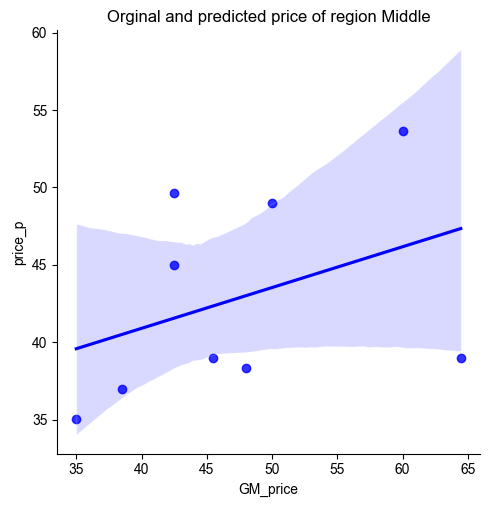

In [43]:
sns.lmplot(x='GM_price', y= 'price_p', data=df_pred_m, scatter_kws={'color':'blue'}, line_kws={'color':'blue'})
sns.set(rc={'figure.figsize':(6,4)})
plt.title('Orginal and predicted price of region Middle')
plt.show

In [44]:
r2_score(y_test_m, y_test_p_m)

-0.1931652668111543

In [45]:
math.sqrt(mean_squared_error(y_test_m, y_test_p_m))

9.912675569161669

The R2 has a score of -0,19. This R2 score means to what extent the model can predict and explain the predicted variable in comparison with the actual data (Iqbal et al., 2021). As seen from the values in the table, graphs, and output of the R2 score, it is clear that the model is not a good fit and does a very bad job in predicting the predicted price variable. This might be because of the small dataset, and it needs to be trained with more data to find the best predicted price.

The RMSE score demonstrates the difference between the actual data and predicted data and how far off the predicted data is from the actual data (Iqbal et al., 2021). The RMSE score indicated that the prediction was off by 9,91 euros. This actually surprised me, since the model is not a good fit and the original prices are very different from each other, and the model predicts an off score that's not that high.

#### Evaluate model: southeast

<function matplotlib.pyplot.show(close=None, block=None)>

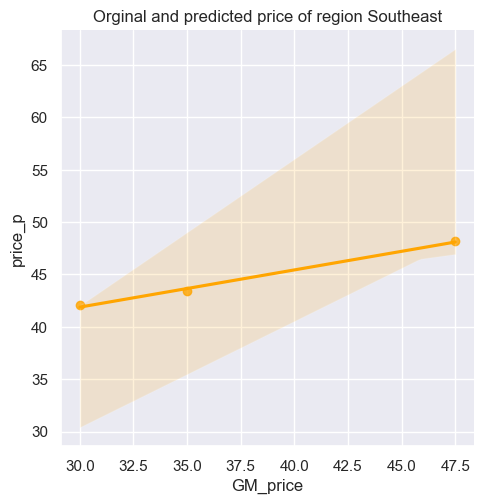

In [46]:
sns.lmplot(x='GM_price', y= 'price_p', data=df_pred_se, scatter_kws={'color':'orange'}, line_kws={'color':'orange'})
sns.set(rc={'figure.figsize':(6,4)})
plt.title('Orginal and predicted price of region Southeast')
plt.show

In [47]:
r2_score(y_test_se, y_test_p_se)

-0.33296495228128054

In [48]:
math.sqrt(mean_squared_error(y_test_se, y_test_p_se))

8.497191786029626

The prediction for this region is also very inaccurate, based on the R2 score of -0.33 and the table of predicted prices. The RMSE score is lower than the previous region's predictions. For both scores, I think it could be improved by having a larger dataset.

#### Evaluate model: southwest

<function matplotlib.pyplot.show(close=None, block=None)>

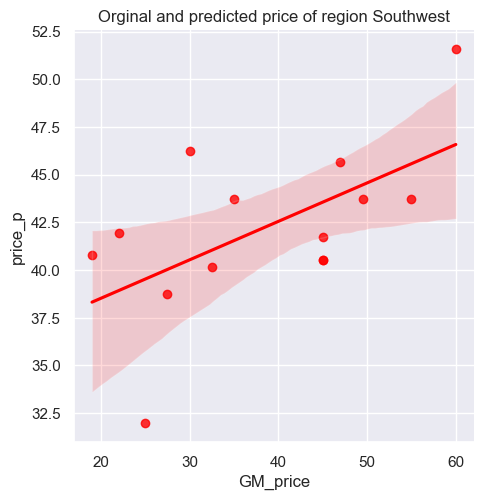

In [49]:
sns.lmplot(x='GM_price', y= 'price_p', data=df_pred_sw,  scatter_kws={'color':'red'}, line_kws={'color':'red'})
sns.set(rc={'figure.figsize':(6,4)})
plt.title('Orginal and predicted price of region Southwest')
plt.show

In [50]:
r2_score(y_test_sw, y_test_p_sw)

0.18828476297281727

In [51]:
math.sqrt(mean_squared_error(y_test_sw, y_test_p_sw))

11.11444294298815

The predictions for the southwest region are slightly better than those for the previous regions.The R2 score is 1.88%, indicating that the model fits the data with 1.88% accuracy.This is still a very poor performance. This might be because the dataset is still small and has very varying values. If the dataset were larger and more consistent in price range, it might be predicted better.

The RMSE value indicates that the model is 11 points off. Given the original and predicted values, this is a nice score that's within the range of all the original prices.

#### Evaluate model: northwest

<function matplotlib.pyplot.show(close=None, block=None)>

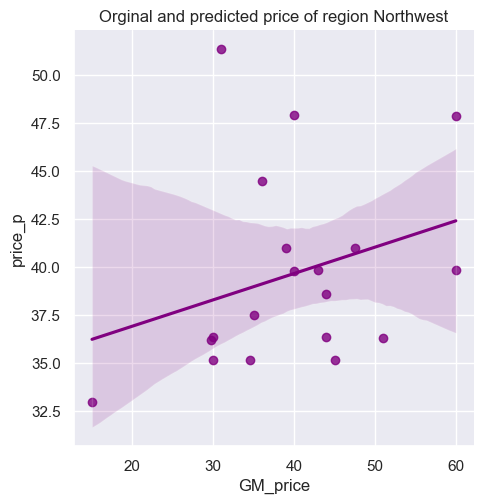

In [52]:
sns.lmplot(x='GM_price', y= 'price_p', data=df_pred_nw, scatter_kws={'color':'purple'}, line_kws={'color':'purple'})
sns.set(rc={'figure.figsize':(6,4)})
plt.title('Orginal and predicted price of region Northwest')
plt.show

In [53]:
r2_score(y_test_nw, y_test_p_nw)

0.060057607720568784

In [54]:
math.sqrt(mean_squared_error(y_test_nw, y_test_p_nw))

10.255675977128039

For the northwest region, the model prediction is also very weak, based on the R2 score of 0.6% and the table.
The RMSE score is somewhat the same as the previous regions' scores. I maybe did expect a better R2 score because the dataset is a bit larger and there are more values closer to the linear regression line, so the values that are predicted are almost very accurate. However, with a larger dataset and more consistent prices, it would give a better prediction.

#### Evaluate model: north

<function matplotlib.pyplot.show(close=None, block=None)>

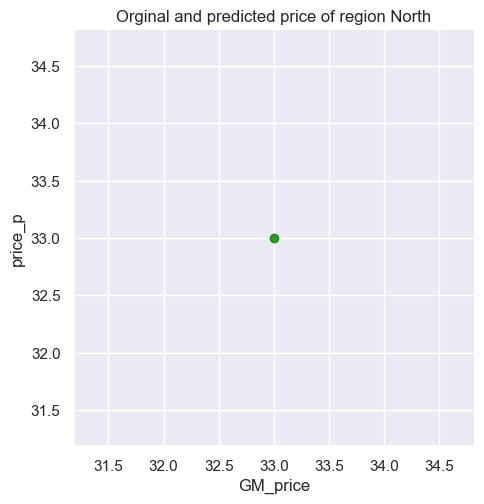

In [55]:
sns.lmplot(x='GM_price', y= 'price_p', data=df_pred_n,  scatter_kws={'color':'green'}, line_kws={'color':'green'})
sns.set(rc={'figure.figsize':(6,4)})
plt.title('Orginal and predicted price of region North')
plt.show

In [56]:
r2_score(y_test_n, y_test_p_n)

C:\Users\tusha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


nan

In [57]:
math.sqrt(mean_squared_error(y_test_n, y_test_p_n))

0.0

The prediction for the north region is useless, as I already knew from the start, because it had a dataset of three values. This resulted in one predicted value as the model was tested with 30% of the dataset, which resulted in a R2 score of NaN and a RMSE score of 0.

But looking at the table where the original price and the predicted price are side by side, the model predicted a very accurate price based on three values.

#### Evaluate model: whole dataset

<function matplotlib.pyplot.show(close=None, block=None)>

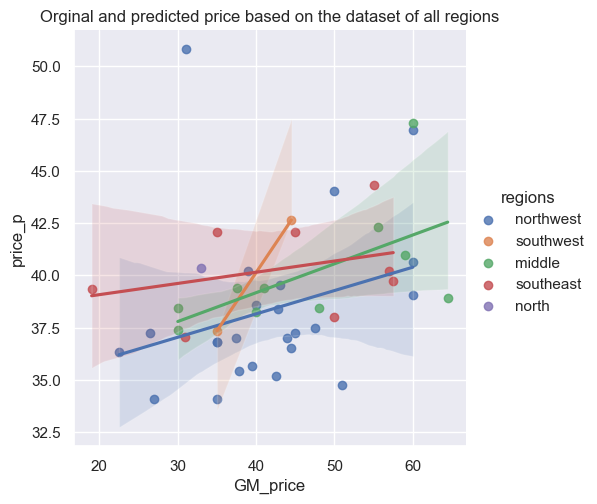

In [58]:
sns.lmplot(x='GM_price', y= 'price_p', hue='regions', data=df_pred)
sns.set(rc={'figure.figsize':(6,4)})
plt.title('Orginal and predicted price based on the dataset of all regions')
plt.show

In [59]:
r2_score(y_test, y_test_p)

0.02168259371030945

In [60]:
math.sqrt(mean_squared_error(y_test, y_test_p))

10.941391533094821

In this last graph, the result of the R2 score indicates that the model fits the data by 0.22%. This is a very weak performance by the model. Some R2 scores of the models that individually tested the regions were higher than this score. It can be concluded that the model has a weak ability to explain the variance in the variable predicted price.

The RMSE score is almost the same as the RMSE score of the predictive models for each individual region. However, this dataset is much larger because it includes data from all regions. Given that the dataset is larger and the values differ from each other, I'm pretty surprised that the prediction is just 10,94 euros off and think that this deviation is not that high.

### Conclusion

<i>The research question of this project is: Given variables gel polish manicure price, ratings, duration, and location, how well can the gel polish manicure price of different regions be predicted by a machine learning model?</i>

In this project, a machine learning model was trained to predict gel polish manicure prices in different regions based on ratings, duration, and location. The model's performance was evaluated for each region and for all regions using the R-squared value. Based on the R-squared value of all the model performances for each situation, it can be concluded that the model does not have a strong ability to explain the variance in the gel polish manicure prices of different regions. To improve the accuracy of the R2 score and the amount of the RMSE score, it can be suggested to train the dataset based on a larger dataset with more of the same treatment prices in each region.

## References

Custer, C. (2020, July 1). Tutorial: Add a Column to a Pandas DataFrame Based on an If-Else Condition. Dataquest. https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/ 

Iqbal, M., Iqbal, M., Jaskani, F., Iqbal, K., & Hassan, A. (2021). Time-series prediction of cryptocurrency market using machine learning techniques. EAI Endorsed Transactions on Creative Technologies, 8(28).

Maulud, D., & Abdulazeez, A. M. (2020). A review on linear regression comprehensive in machine learning. Journal of Applied Science and Technology Trends, 1(4), 140-147.

Processing. (n.d.) Integers Floats. https://processing.org/examples/integersfloats.html 

Regioindeling KNMI. (2020, May 8). In Wikipedia. https://nl.wikipedia.org/wiki/Regioindeling_KNMI 